In [64]:
import nltk
from nltk.corpus import reuters, stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/ahmedhanif/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahmedhanif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ahmedhanif/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedhanif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
corpus_sentences = []
stop_words = set(stopwords.words('english'))
for fileid in reuters.fileids():
    raw_text = reuters.raw(fileid)
    tokenized_sentence = [word.lower() for word in nltk.word_tokenize(raw_text) 
                          if word.isalnum() and word.lower() not in stop_words]
    corpus_sentences.append(tokenized_sentence)
print(f"Number of sentences in the Reuters corpus: {len(corpus_sentences)}")

Number of sentences in the Reuters corpus: 10788


In [9]:
model = Word2Vec(sentences=corpus_sentences, vector_size=100, window=5,min_count=5,workers=4)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [23]:
Word2Vec?

Init signature:
Word2Vec(
    sentences=None,
    corpus_file=None,
    vector_size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    ns_exponent=0.75,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    epochs=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    comment=None,
    max_final_vocab=None,
    shrink_windows=True,
)
Docstring:     
Serialize/deserialize objects from disk, by equipping them with the `save()` / `load()` methods.

Warnings
--------
This uses pickle internally (among other techniques), so objects must not contain unpicklable attributes
such as lambda functions etc.
Init docstring:
Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

Once you're finished training a model (=no more updates, only querying)
store

In [11]:
len(model.wv.index_to_key) #vocab size

10407

In [16]:
words = list(model.wv.index_to_key)[:200]
word_vectors = np.array([model.wv[word] for word in words])
word_vectors

array([[-0.07942639,  0.08786587,  0.21480845, ..., -0.96554494,
         0.47297853,  0.18734893],
       [-0.6227197 , -0.1794449 ,  0.45150104, ..., -0.45406395,
         0.8861817 , -1.4687343 ],
       [ 0.5669361 , -0.8147767 ,  0.5406753 , ..., -2.6950934 ,
         2.0928366 , -3.2258708 ],
       ...,
       [ 0.22224627, -0.2291496 ,  0.84123486, ..., -0.3580202 ,
        -0.69271916, -0.20021342],
       [ 0.06004682,  0.13253546, -0.10928701, ..., -0.3722348 ,
        -1.6231089 , -0.5327345 ],
       [ 1.1741774 , -0.23279928,  1.3211083 , ..., -0.9804003 ,
         0.3600234 , -2.1259325 ]], shape=(200, 100), dtype=float32)

In [17]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)

/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid val

In [20]:
def plot_embeddings(vectors, labels):
    plt.figure(figsize=(16, 12))
    for i, label in enumerate(labels):
        x, y = vectors[i]
        plt.scatter(x, y, color='blue')
        plt.text(x + 0.1, y + 0.1, label, fontsize=9)
    plt.title("Word2Vec Embeddings Visualized with t-SNE")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

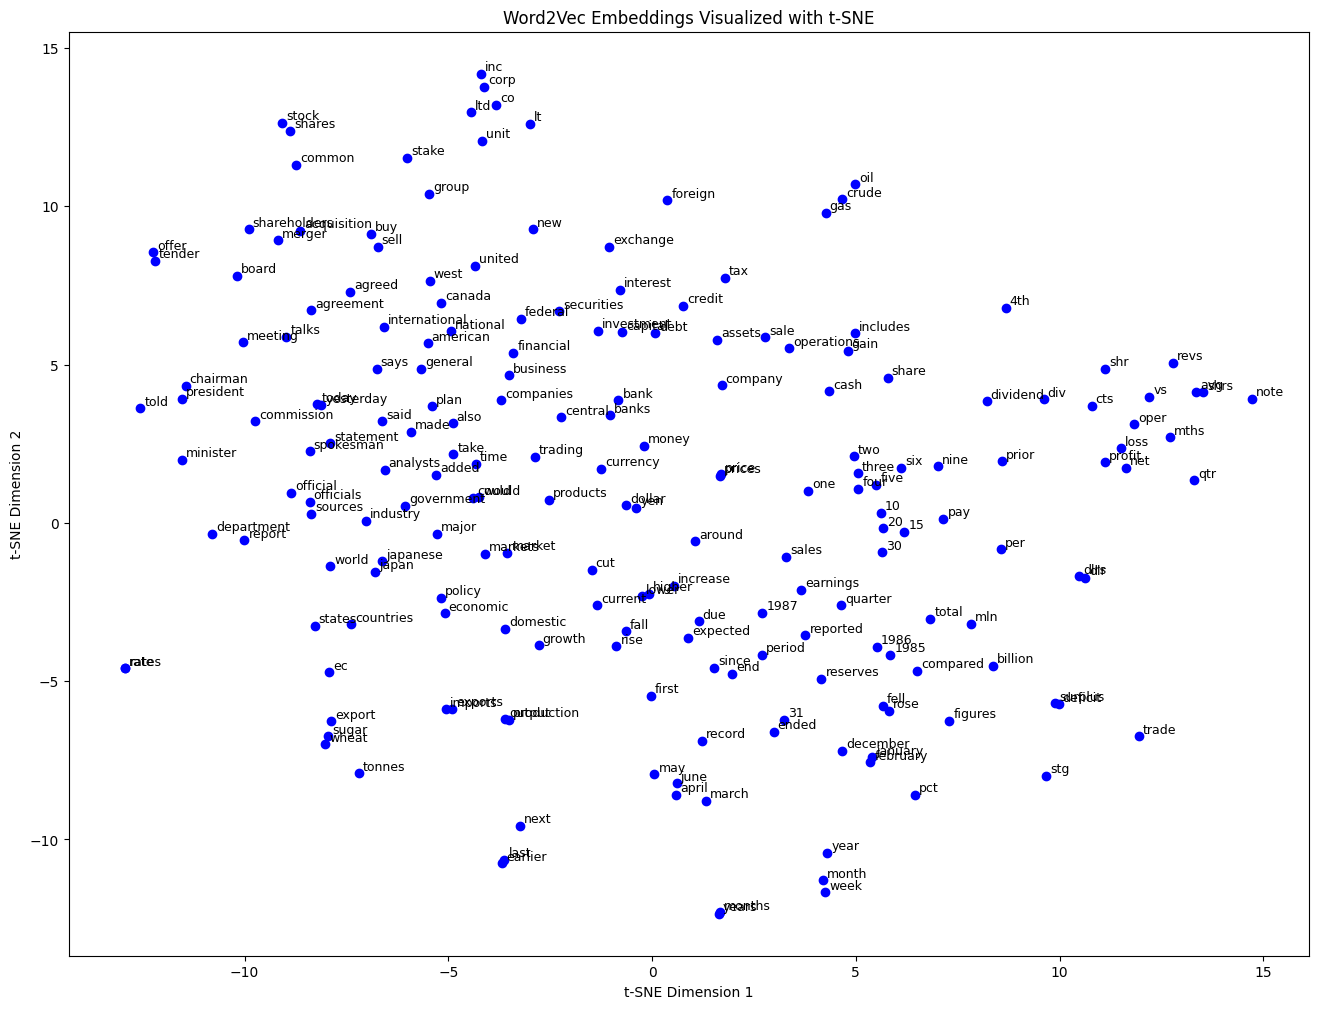

In [22]:
plot_embeddings(word_vectors_2d, words)

# Questions

## Observations
Oil Crude and Gas got clustered together.
So did export sugar wheat
Name of Months...

Overall, words with semantically similar meaning are grouped together.

## How do choice of parameters affect embedding?

Vector size represents dimensionality of word vectors.... <br>
window is the Maximum distance between the current and predicted word within a sentence.

'''
The window size is like a sliding window that passes over the text and determines which words are analyzed in context of a target word. Words within the window are considered as context words, while those outside are ignored.

The choice of window size impacts the quality of learned word vectors. A smaller window size results in learning more about the word’s syntactic roles, while a larger window size helps the model understand the broader semantic context.

However, there’s a trade-off to consider. A larger window size increases the computational complexity as more context words have to be processed for each target word. Therefore, the choice of window size should be done carefully, taking into account both the computational resources and the specific requirements of the task [1]
'''

## What are the limitations of using Word2Vec and t-SNE for NLP Tasks?

some disadvantages of using word2vec are that words may not appear during training.
it depends on window size, and may not capture words out of that context

limitations of tsne include sensitivity to hyperparameters

[1] https://swimm.io/learn/large-language-models/what-is-word2vec-and-how-does-it-work

# Information Retrieval Task

In [96]:
from nltk.corpus import reuters

In [97]:
## Setup

file_ids = reuters.fileids()
categories = reuters.categories()
print(len(categories), "First Five:", categories[:10])

90 First Five: ['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee']


In [98]:
query = "What is the president of the United States upto?"

In [99]:
# Given a query string, find the most relevant documents from the Reuters corpus using Word2Vec embeddings.

'''
Approach:
- Train Word2Vec Model on Reuters Corpus
- Create Document Embeddings by averaging word vectors
- Convert the query to an embedding using the same method
- Calculate Similarity between the query and the documents
- Rank and Return similar documents
'''

'\nApproach:\n- Train Word2Vec Model on Reuters Corpus\n- Create Document Embeddings by averaging word vectors\n- Convert the query to an embedding using the same method\n- Calculate Similarity between the query and the documents\n- Rank and Return similar documents\n'

In [100]:
def preprocess_text(input_text, stopwords):
    tokens = nltk.word_tokenize(input_text.lower())
    # Remove Stop Words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

def get_document_embedding(tokens, model):
    '''
    computes average word2vec embedding for a document
    '''
    word_vectors = []
    for token in tokens:
        if token in model.wv:
            word_vectors.append(model.wv[token])
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)

    return np.mean(word_vectors, axis = 0) #whyyy    

def display_results(query, results):
    print("\n" + "=" * 80)
    print("Top Relevant Documents:")
    print("=" * 80)
    
    for doc_id, similarity, preview in results:
        print(f"Document ID: {doc_id}, Similarity Score: {similarity:.4f}")
        print(f"Document Content: {preview}")
        print()

In [101]:
stop_words = set(stopwords.words('english'))

In [102]:
doc_ids = reuters.fileids()

In [103]:
corpus_sentences = []
for doc_id in doc_ids:
    raw_text = reuters.raw(doc_id)
    tokens = preprocess_text(raw_text, stop_words)
    corpus_sentences.append(tokens)


In [104]:
model = Word2Vec(
        sentences=corpus_sentences,
        vector_size=100,
        window=5,
        min_count=5,
        workers=4,
        epochs=10
    )

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [105]:
doc_embeddings = []
for tokens in corpus_sentences:
    embedding = get_document_embedding(tokens, model)
    doc_embeddings.append(embedding)
doc_embeddings = np.array(doc_embeddings)

In [106]:
## Preprocess the query string by tokenizing and removing stop words.

In [107]:
queries = [
        "international trade agreement buffer stock",
        "oil prices crude production",
        "economic growth inflation",
        "saudi arabic oil prices"
    ]

query = queries[1]
query

'oil prices crude production'

In [108]:
## Compute the average Word2Vec embedding for the query string.

In [109]:
query_tokens = preprocess_text(query, stop_words)

In [110]:
## Compute the average Word2Vec embedding for each document in the Reuters corpus.

In [111]:
query_embedding = get_document_embedding(query_tokens, model)
query_embedding = query_embedding.reshape(1, -1) #whyyyyy
query_embedding.shape

(1, 100)

In [112]:
## Use cosine similarity to �nd the top N most relevant documents for the query

In [113]:
similarities = cosine_similarity(query_embedding, doc_embeddings)[0]

/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ahmedhanif/miniconda3/envs/ds1/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [114]:
# Display the top N document IDs and their similarity scores.

In [115]:
top_n = 5
top_indices = np.argsort(similarities)[::-1][:top_n]

In [116]:
results = []

for idx in top_indices:
        doc_id = doc_ids[idx]
        similarity = similarities[idx]
        
        raw_text = reuters.raw(doc_id)
        # get first 100 characters for preview
        preview = ' '.join(raw_text.split()[:15]) + '...'
        
        results.append((doc_id, similarity, preview))

In [117]:
display_results(query, results)


Top Relevant Documents:
Document ID: training/1387, Similarity Score: 0.8489
Document Content: SAUDI SUCCESS SEEN IN CURBING OPEC PRODUCTION Saudi Arabia will succeed in pressuring other members...

Document ID: training/127, Similarity Score: 0.8385
Document Content: DIAMOND SHAMROCK (DIA) CUTS CRUDE PRICES Diamond Shamrock Corp said that effective today it had...

Document ID: training/11149, Similarity Score: 0.8318
Document Content: U.S. SHOULD REASSESS MIDEAST POLICY - ANALYST The U.S. should reassess its Mideast policy in...

Document ID: test/18108, Similarity Score: 0.8281
Document Content: ENERGY SECRETARY SEES HIGHER OIL PRICES Energy Secretary Donald Hodel said he expects oil prices...

Document ID: training/2775, Similarity Score: 0.8180
Document Content: CRUDE OIL PRICES UP AS STOCKS, OUTPUT FALL U.S. crude oil prices rose above 18...

